In [1]:
import sys
sys.path.append('../')

import os
from PIL import Image
import pandas as pd

In [2]:
from wmdetection.models import get_watermarks_detection_model
from wmdetection.pipelines.predictor import WatermarksPredictor
from wmdetection.utils import list_images

### Create a model and predictor

In [3]:
model, transforms = get_watermarks_detection_model('convnext-tiny', fp16=False)

In [4]:
predictor = WatermarksPredictor(model, transforms, 'cuda:0')

### Read test dataset csv

In [5]:
validation_dataset = '../dataset/watermarks-validation'

df = pd.read_csv(os.path.join(validation_dataset, 'validation_data.csv'))
df['path'] = df['path'].apply(lambda x: os.path.join(validation_dataset, x))

### Get predictions on test set

In [6]:
df['predicted'] = predictor.run(df['path'].values, bs=32)
df['predicted'] = df['predicted'].astype(bool)

100%|██████████| 4/4 [00:07<00:00,  1.95s/it]


In [7]:
df

,path,watermark,predicted
0,../dataset/watermarks-validation/watermark/0pr...,True,True
1,../dataset/watermarks-validation/watermark/149...,True,True
2,../dataset/watermarks-validation/watermark/179...,True,True
3,../dataset/watermarks-validation/watermark/1mp...,True,True
4,../dataset/watermarks-validation/watermark/200...,True,True
...,...,...,...
117,../dataset/watermarks-validation/clean/vmxw2sx...,False,False
118,../dataset/watermarks-validation/clean/wqj7tkn...,False,False
119,../dataset/watermarks-validation/clean/wswasv1...,False,False
120,../dataset/watermarks-validation/clean/xa8vads...,False,False


### Calc metrics

In [8]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(df['watermark'].values, df['predicted'].values))

Accuracy: 0.9344262295081968


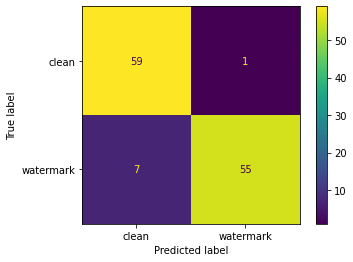

In [9]:
from wmdetection.pipelines.metrics import plot_confusion_matrix

plot_confusion_matrix(df['watermark'].values, df['predicted'].values)